In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf 

In [2]:
start = '2012-01-01'
end = '2023-12-21'
stock = 'GOOG'

data = yf.download(stock,start,end)

[*********************100%%**********************]  1 of 1 completed


In [3]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,16.262545,16.641375,16.248346,16.573130,16.573130,147611217
2012-01-04,16.563665,16.693678,16.453827,16.644611,16.644611,114989399
2012-01-05,16.491436,16.537264,16.344486,16.413727,16.413727,131808205
2012-01-06,16.417213,16.438385,16.184088,16.189817,16.189817,108119746
2012-01-09,16.102144,16.114599,15.472754,15.503389,15.503389,233776981
...,...,...,...,...,...,...
2023-12-13,134.544998,134.779999,132.949997,133.970001,133.970001,25414500
2023-12-14,134.770004,135.035004,131.059998,133.199997,133.199997,29619100
2023-12-15,132.919998,134.830002,132.630005,133.839996,133.839996,58569400


In [4]:
data.reset_index(inplace=True)
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,16.262545,16.641375,16.248346,16.573130,16.573130,147611217
1,2012-01-04,16.563665,16.693678,16.453827,16.644611,16.644611,114989399
2,2012-01-05,16.491436,16.537264,16.344486,16.413727,16.413727,131808205
3,2012-01-06,16.417213,16.438385,16.184088,16.189817,16.189817,108119746
4,2012-01-09,16.102144,16.114599,15.472754,15.503389,15.503389,233776981
...,...,...,...,...,...,...,...
3006,2023-12-13,134.544998,134.779999,132.949997,133.970001,133.970001,25414500
3007,2023-12-14,134.770004,135.035004,131.059998,133.199997,133.199997,29619100
3008,2023-12-15,132.919998,134.830002,132.630005,133.839996,133.839996,58569400
3009,2023-12-18,133.860001,138.380005,133.770004,137.190002,137.190002,25687300


In [5]:
ma_100_days = data.Close.rolling(100).mean()

<function matplotlib.pyplot.show(close=None, block=None)>

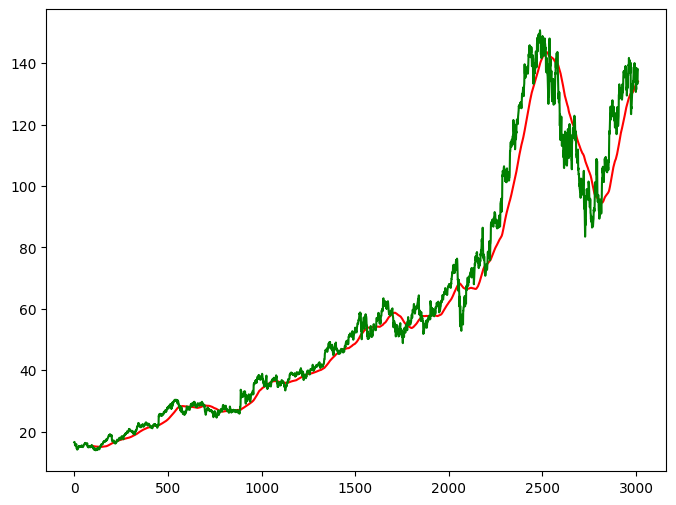

In [6]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days,'r')
plt.plot(data.Close,'g')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

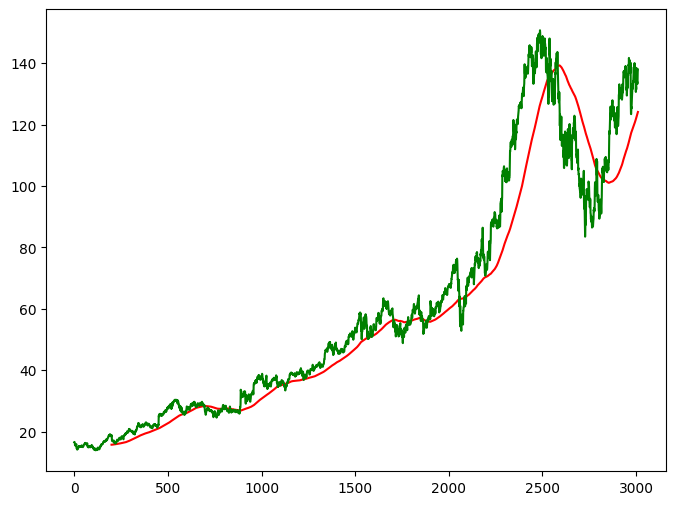

In [7]:
ma_200_days = data.Close.rolling(200).mean()
plt.figure(figsize=(8,6))
plt.plot(ma_200_days,'r')
plt.plot(data.Close,'g')
plt.show

In [8]:
data.dropna(inplace=True)

In [9]:
data_train = pd.DataFrame(data.Close[0:int(len(data)*0.80)])
data_test= pd.DataFrame(data.Close[int(len(data)*0.80):len(data)])

In [10]:
data_train.shape[0]

2408

In [11]:
data_test.shape[0]

603

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [13]:
data_train_scale= scaler.fit_transform(data_train)

In [14]:
10,11,12,

(10, 11, 12)

In [15]:
x= []
y= []
for i in range(100,data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])

In [16]:
pip install keras

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [17]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [18]:
import tensorflow as tf

In [19]:
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential

In [20]:
x,y =np.array(x),np.array(y)

In [21]:
model = Sequential()
model.add(LSTM(units = 50,activation = 'relu',return_sequences = True,input_shape=((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units= 60,activation ='relu',return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units=80,activation = 'relu',return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))


In [22]:
model.compile(optimizer = 'adam',loss ='mean_squared_error')

In [23]:
model.fit(x,y, epochs=50, batch_size = 32, verbose = 1)

Epoch 1/50

73/73 [==============================] - 29s 267ms/step - loss: 0.0179
Epoch 2/50
73/73 [==============================] - 19s 257ms/step - loss: 0.0036
Epoch 3/50
73/73 [==============================] - 23s 311ms/step - loss: 0.0032
Epoch 4/50
73/73 [==============================] - 24s 332ms/step - loss: 0.0032
Epoch 5/50
73/73 [==============================] - 22s 305ms/step - loss: 0.0028
Epoch 6/50
73/73 [==============================] - 22s 308ms/step - loss: 0.0027
Epoch 7/50
73/73 [==============================] - 23s 309ms/step - loss: 0.0023
Epoch 8/50
73/73 [==============================] - 22s 296ms/step - loss: 0.0027
Epoch 9/50
73/73 [==============================] - 20s 273ms/step - loss: 0.0022
Epoch 10/50
73/73 [==============================] - 18s 246ms/step - loss: 0.0022
Epoch 11/50
73/73 [==============================] - 19s 262ms/step - loss: 0.0022
Epoch 12/50
73/73 [==============================] - 20s 269ms/step - loss: 0.0022
Epoch 13/50


In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [25]:
pas_100_days = data_train.tail(100)

In [26]:
data_tedt = pd.concat([pas_100_days , data_test],ignore_index = True)

In [27]:
data_test_scale = scaler.fit_transform(data_test)

In [28]:
x= []
y= []
for i in range(100,data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])

In [29]:
x = np.array(x)
y = np.array(y)

In [30]:
y_predict = model.predict(x)
#print(y_predict)

16/16 [==============================] - 3s 85ms/step


In [31]:
scale =1/scaler.scale_
print(scale)

[67.21900177]


In [32]:
y_predict = y_predict*scale
#print(y_predict)

In [33]:
y = y*scale
#print(y)

<function matplotlib.pyplot.show(close=None, block=None)>

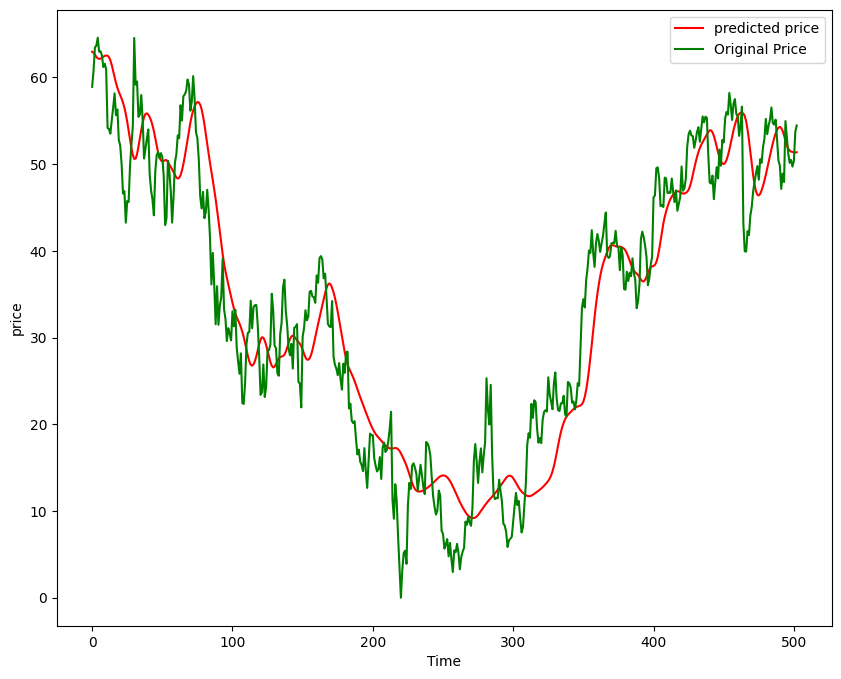

In [34]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r',label = 'predicted price')
plt.plot(y,'g',label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('price')
plt.legend()
plt.show


In [35]:
model.save('stock price prediction model.keras')